In [67]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import optimize
import pandas as pd

from scipy import integrate
from scipy import special


In [93]:
# Parameters

#s_tilda=np.linspace(0,10,100)
        #doesn't change much between the choice of 10 or 99


m1 = 0.050                                #GeV DM Mass
delta=0.3*m1
m2=m1+delta

mzprime=1                                  #Mass of the dark photon in GeV
Mp = 1.22e19   
m=0.000501                                 # I choose the electron mass in Gev


s0= m1**2 + m2**2 + 2*m1*m2
sample=np.linspace(0,10,100)      
s=sample+s0                      #the lowest value for s is s0 (assuming velocities zeros)
s_che_va_dentro_sigma=s-s0

epsilon=1E-4               # Has inside some factors as indicated in the computation papers
alpha_dark=1E-4               # what values?
alpha_em=1/137

pfin_pinit= np.sqrt(((s-2*m**2)**2)-4*(m**4)/((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))   # ratio pfinal over p initial
p_fin=np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s)        # p final
p_init=np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s))      # p initial had to add the
               #abs was inside the sqrt to keep it positive           #absolute value because the first elemnt gives a sqrt of negative

E1= np.sqrt(m1**2 + p_init**2)
E2= np.sqrt(m2**2 + p_init**2)


array([0.05      , 0.04772742, 0.04555814, 0.04348745, 0.04151088,
       0.03962414, 0.03782317, 0.03610405, 0.03446306, 0.03289666,
       0.03140146, 0.02997421, 0.02861184, 0.02731139, 0.02607004,
       0.02488512, 0.02375405, 0.02267439, 0.02164381, 0.02066006,
       0.01972103, 0.01882468, 0.01796907, 0.01715235, 0.01637275,
       0.01562858, 0.01491824, 0.01424018, 0.01359294, 0.01297512,
       0.01238538, 0.01182245, 0.0112851 , 0.01077217, 0.01028256,
       0.0098152 , 0.00936909, 0.00894325, 0.00853676, 0.00814875,
       0.00777838, 0.00742484, 0.00708737, 0.00676524, 0.00645775,
       0.00616423, 0.00588406, 0.00561662, 0.00536134, 0.00511766,
       0.00488505, 0.00466302, 0.00445108, 0.00424877, 0.00405565,
       0.00387132, 0.00369536, 0.0035274 , 0.00336708, 0.00321404,
       0.00306795, 0.00292851, 0.00279541, 0.00266835, 0.00254707,
       0.0024313 , 0.00232079, 0.00221531, 0.00211462, 0.00201851,
       0.00192676, 0.00183919, 0.0017556 , 0.0016758 , 0.00159

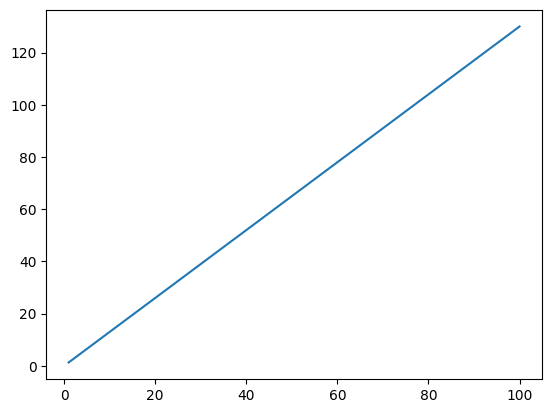

In [69]:

# parameters
m1 = 0.050                                #GeV DM Mass
delta=0.3*m1
m2=m1+delta
Mp = 1.22e19                            #GeV Planck Mass


x1=np.logspace(np.log10(1),np.log10(100),100)
x2=x1*((m1+delta)/m1)
plt.plot(x1,x2)

T=m2/x2
T

In [70]:
Ttrue=np.flip(T)
Ttrue

array([0.0005    , 0.00052381, 0.00054875, 0.00057488, 0.00060225,
       0.00063093, 0.00066097, 0.00069244, 0.00072541, 0.00075996,
       0.00079614, 0.00083405, 0.00087376, 0.00091537, 0.00095896,
       0.00100462, 0.00105245, 0.00110257, 0.00115506, 0.00121006,
       0.00126768, 0.00132804, 0.00139128, 0.00145753, 0.00152693,
       0.00159963, 0.0016758 , 0.0017556 , 0.00183919, 0.00192676,
       0.00201851, 0.00211462, 0.00221531, 0.00232079, 0.0024313 ,
       0.00254707, 0.00266835, 0.00279541, 0.00292851, 0.00306795,
       0.00321404, 0.00336708, 0.0035274 , 0.00369536, 0.00387132,
       0.00405565, 0.00424877, 0.00445108, 0.00466302, 0.00488505,
       0.00511766, 0.00536134, 0.00561662, 0.00588406, 0.00616423,
       0.00645775, 0.00676524, 0.00708737, 0.00742484, 0.00777838,
       0.00814875, 0.00853676, 0.00894325, 0.00936909, 0.0098152 ,
       0.01028256, 0.01077217, 0.0112851 , 0.01182245, 0.01238538,
       0.01297512, 0.01359294, 0.01424018, 0.01491824, 0.01562

In [71]:
s

array([ 0.013225  ,  0.1142351 ,  0.2152452 ,  0.3162553 ,  0.4172654 ,
        0.51827551,  0.61928561,  0.72029571,  0.82130581,  0.92231591,
        1.02332601,  1.12433611,  1.22534621,  1.32635631,  1.42736641,
        1.52837652,  1.62938662,  1.73039672,  1.83140682,  1.93241692,
        2.03342702,  2.13443712,  2.23544722,  2.33645732,  2.43746742,
        2.53847753,  2.63948763,  2.74049773,  2.84150783,  2.94251793,
        3.04352803,  3.14453813,  3.24554823,  3.34655833,  3.44756843,
        3.54857854,  3.64958864,  3.75059874,  3.85160884,  3.95261894,
        4.05362904,  4.15463914,  4.25564924,  4.35665934,  4.45766944,
        4.55867955,  4.65968965,  4.76069975,  4.86170985,  4.96271995,
        5.06373005,  5.16474015,  5.26575025,  5.36676035,  5.46777045,
        5.56878056,  5.66979066,  5.77080076,  5.87181086,  5.97282096,
        6.07383106,  6.17484116,  6.27585126,  6.37686136,  6.47787146,
        6.57888157,  6.67989167,  6.78090177,  6.88191187,  6.98

In [72]:
print(s_che_va_dentro_sigma)
print(sample)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

In [73]:
m1**2 + m2**2 + 2*m1*m2

0.013225

In [74]:
(((s[0]-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s[0]

-4.480804290975249e-23

In [75]:
(m1*m2)**2

1.0562500000000003e-05

$$\sigma= \frac{16 \pi \epsilon^2 \alpha_D \alpha}{s(s-m_{Z'}^2)^2} \frac{|p_{final}|}{|p_{initial}|}\Big( \frac{sE_1E_2}{2}+ \frac{2}{3} p_{final}^2 p_{initial}^2 + \frac{m^2(s-m_1^2-m_2^2)}{2}+ \frac{m_1m_2(s-2m^2)}{2}+ 2m^2 m_1 m_2 \Big)$$

$$\langle \sigma v \rangle = \frac{1}{8 m_1^2m_2^2TK_2(m_1/T)K_2(m_2/T)} \int_{s_0}^{\infty} \sigma(\tilde{s}-s_0)\sqrt{\tilde{s}}K_1(\sqrt{\tilde{s}}/T)ds \rightarrow^{\text{non-rel.}} b_0 + \frac{3}{2}b_1 x^{-1}+...$$  for iDM

S TILDE E' S, SONO LA STESSA COSA, ED S0 E' 4M**2 OPPURE S0 NEL CASO DI iDM

In [76]:
# THIS IS THE WHOLE FORMULA FOR THE COANNIHILATION CROSS SECTION

#IT'S WITH THE CONSIDERATION OF DIFFERENT MASSES m1 AND m2 AS IN THA iDM CASE.
#THE FORMULA SHOULD BE CORRECT

#IF CONSIDERING m1=m1 AS GORDAN'S CASE WE END UP WITH THE SAME FORMULA A PART FROM:
  # AN OVERRALL FACTOR 2 MULTIPLYING THE ALL FORMULA (MAYBE BECAUSE I HAVEN'T AVERAGED OVER THE INITIAL STATES?)
  # A FACTOR 2 MULTUPLYING THE LAST MASS TERM 

# I NEED TO AVERAGE OVER THE INITIAL STATES BUT WHAT IS THE VALUE?
# I NEED TO SUM OVER THE FINAL STATES BUT WHAT IS THE VALUE? HOW MANY FINAL STATES? ALL THE FERMIONS????????


def sigma(s_che_va_dentro_sigma):
    return ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_che_va_dentro_sigma-mzprime**2)**2))*(pfin_pinit/s_che_va_dentro_sigma)*((s_che_va_dentro_sigma*E1*E2/2)+(2*(p_init**2)*(p_fin**2)/3)+((m**2)*(s_che_va_dentro_sigma-(m1**2)-(m2**2))/2)+((m1*m2)*(s_che_va_dentro_sigma-2*(m**2))/2)+((m**2)*m1*m2*2))         



$$s-s_0=-2m^2+2E_1E_2-2 \vec{p_1} \cdot \vec{p_2}$$

$$\tilde{s}- 4m^2=2m^2+2E_1E_2-2p_1 \cdot p_2- 4m^2 $$

$$\vec{p_1} \cdot \vec{p_2}=2p_1p_2 \cos \theta_{CM}$$

In [77]:
special.kn(1,np.sqrt(s_tilda[0])/T[0])

inf

In [95]:
len(((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_che_va_dentro_sigma-mzprime**2)**2))*(pfin_pinit/s_che_va_dentro_sigma)*((s_che_va_dentro_sigma*E1*E2/2)+(2*(p_init**2)*(p_fin**2)/3)+((m**2)*(s_che_va_dentro_sigma-(m1**2)-(m2**2))/2)+((m1*m2)*(s_che_va_dentro_sigma-2*(m**2))/2)+((m**2)*m1*m2*2)))

/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_898/231377544.py:1: RuntimeWarning: divide by zero encountered in divide
  len(((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_che_va_dentro_sigma-mzprime**2)**2))*(pfin_pinit/s_che_va_dentro_sigma)*((s_che_va_dentro_sigma*E1*E2/2)+(2*(p_init**2)*(p_fin**2)/3)+((m**2)*(s_che_va_dentro_sigma-(m1**2)-(m2**2))/2)+((m1*m2)*(s_che_va_dentro_sigma-2*(m**2))/2)+((m**2)*m1*m2*2)))


100

In [98]:
def integr(s_tilda):
    return np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue)


container=[]
for value in range(len(Ttrue)):
    container.append(integrate.quad(lambda s_tilda:     np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue[value]), s0,np.inf)[0])     

    
    
    
    
    # WHITOUT ADDING sigma(s_tilda) IT WORKS, I DON'T KNOW IF WORKS WELL BUT IT WORKS
    # IN PRINCIPLE YOU SHOULD INSERT s-s0 AS VARIABLE TO INTEGRATE INTO.
    #BUT I CAN JUST SUBSTITUTE s_che_va_dentro_sigma WITH (s_che_va_dentro_sigma-s0)
    #I have to solve the reason why it doesn't integrate before.
    
#    ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_tilda-mzprime**2)**2))*(pfin_pinit/s_tilda)*((s_tilda*E1*E2/2)+(2*(p_init**2)*(p_fin**2)/3)+((m**2)*(s_tilda-(m1**2)-(m2**2))/2)+((m1*m2)*(s_tilda-2*(m**2))/2)+((m**2)*m1*m2*2))     
    
    #TypeError: only size-1 arrays can be converted to Python scalars?!?!?!?!?!

In [81]:
container

[1.2192266669760675e-112,
 9.771053902598245e-108,
 4.692156592478097e-103,
 1.3819344836769197e-98,
 2.552328193089902e-94,
 3.0194741525460453e-90,
 2.3348812714520235e-86,
 1.2031791012369901e-82,
 4.2086186544017075e-79,
 1.0170454777219188e-75,
 1.7267631188378358e-72,
 2.0930762520054281e-69,
 1.83928412075907e-66,
 1.1889767236308822e-63,
 5.7334937614225424e-61,
 2.0901239388494498e-58,
 5.833829652579233e-56,
 1.2619314871246219e-53,
 2.1401779304190884e-51,
 2.8773925278978374e-49,
 3.09933291643202e-47,
 2.7016782317399887e-45,
 1.9243000326914914e-43,
 1.1302469728822959e-41,
 5.522576288073125e-40,
 2.2636606164843248e-38,
 7.846038097280173e-37,
 2.3172328797095067e-35,
 5.873937664557965e-34,
 1.2869034328798182e-32,
 2.45300857266337e-31,
 4.093900701837861e-30,
 6.018446761677848e-29,
 7.83871633365027e-28,
 9.095144716615225e-27,
 9.450625280526541e-26,
 8.838452113297072e-25,
 7.475430209182417e-24,
 5.74414883502639e-23,
 4.0275403114636075e-22,
 2.5875468140052444e

In [82]:
print(len(container))
print(container[0])
print(container[1])
print(container[99])
print(4*m**2)

100
1.2192266669760675e-112
9.771053902598245e-108
0.000213892371817927
1.0040040000000002e-06


/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_898/4054505778.py:3: RuntimeWarning: invalid value encountered in multiply
  plt.plot(linspace, np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue[N]))


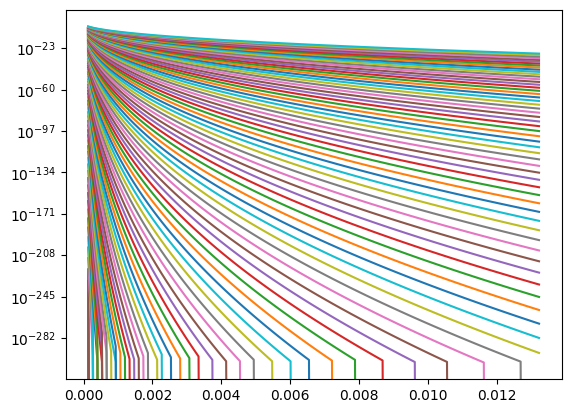

In [83]:
linspace=np.linspace(0,s0,100)
for N in range(100):
    plt.plot(linspace, np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue[N]))

plt.yscale('log')
#plt.xlim(0, 4*m**2)



# THOSE IN PRINCIPLE SHOULD BE THE PLOT OF THE VARIOUS FUNCTION THAT I HAVE TO INTEGRATE FROM 4*M**2 TO INFINITY

# MAKE SENSE?!?!?!?

# IN MY INTEGRATION s_tilda is a variable in which it integrates into, here is from 0 to 100 GeV, maybe too much?


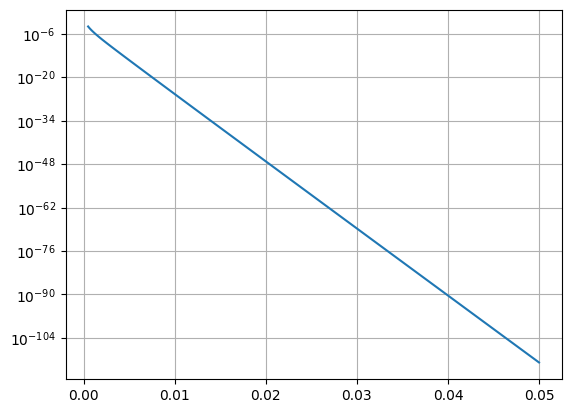

In [84]:

plt.plot(T,container)
plt.yscale('log')
plt.grid()

# How do I understand which values choose for s_tilda and T??
# They seems not in correlation in each other...
# They are like that just because I chose s_tilda to go from 1 to 100 and T same
# But in principle they can behave differently

# Quello che voglio dire è che s si accoppia con in valori di T a caso
# Il rpimo valore di s è 1, quello di T è 100 e si accoppiano così dando K1(1/100) e così via

# Esiste un legame fra s e la temperatura?!?!?!?!?!?!?!?

In [85]:
def DENOM(x1,x2):
    #T=m/x
    return 1/(8* m1**2 * m2**2  *Ttrue *(special.kn(2,x1)*(special.kn(2,x2))))

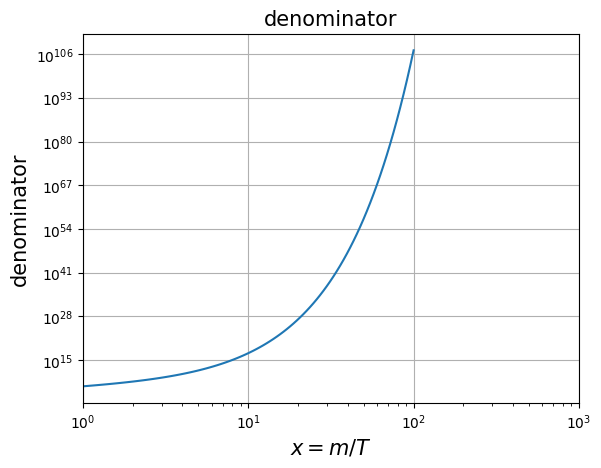

In [86]:
plt.plot(x1,DENOM(x1,x2))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('denominator', size= 15)
plt.title('denominator', size= 15)
plt.grid()

In [87]:
Total= (container/DENOM(x1,x2))
Total

array([7.12613287e-120, 4.74673513e-115, 1.88787757e-110, 4.58769265e-106,
       6.96297560e-102, 6.74014203e-098, 4.24507333e-094, 1.77298579e-090,
       5.00037558e-087, 9.68900629e-084, 1.31123884e-080, 1.25897560e-077,
       8.70498046e-075, 4.39647304e-072, 1.64399621e-069, 4.61047767e-067,
       9.81648703e-065, 1.60541260e-062, 2.03912076e-060, 2.03278147e-058,
       1.60644572e-056, 1.01597968e-054, 5.18862640e-053, 2.15809389e-051,
       7.36964192e-050, 2.08209817e-048, 4.90202773e-047, 9.68363160e-046,
       1.61543904e-044, 2.28967807e-043, 2.77317418e-042, 2.88560670e-041,
       2.59268041e-040, 2.02100921e-039, 1.37282815e-038, 8.15987509e-038,
       4.26024789e-037, 1.96070481e-036, 7.98065106e-036, 2.88150901e-035,
       9.25445718e-035, 2.65042002e-034, 6.78401767e-034, 1.55502752e-033,
       3.19768082e-033, 5.90804608e-033, 9.82043397e-033, 1.47015781e-032,
       1.98388106e-032, 2.41469535e-032, 2.65207857e-032, 2.62891416e-032,
       2.35194871e-032, 1

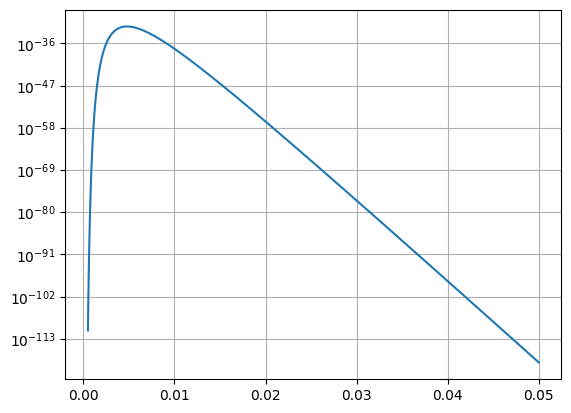

In [88]:

plt.plot(T,Total)
plt.yscale('log')
plt.grid() 


